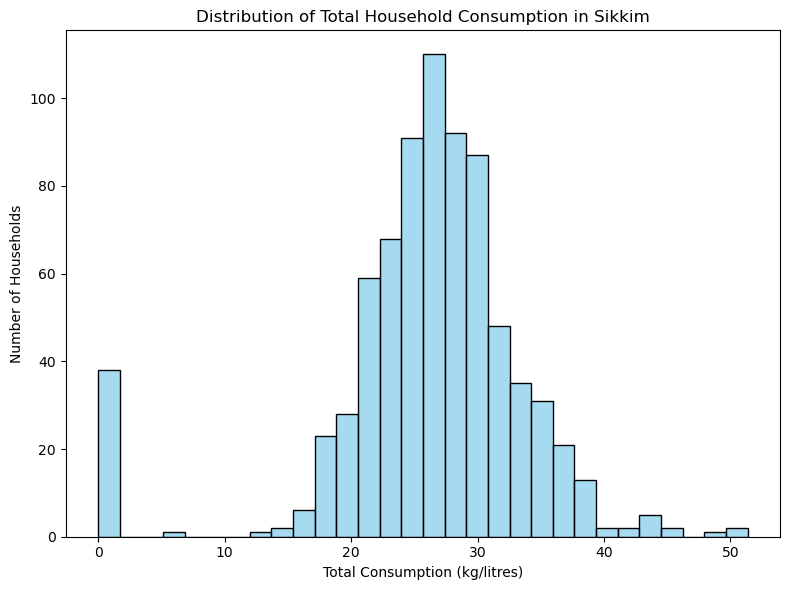

Column 'district_name' not found in your dataset.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Excel file from Downloads
file_path = '/Users/rohithr/Downloads/Sikkim_Data.xlsx'  # Update if needed
sikkim_data = pd.read_excel(file_path)

# Step 2: Fill all NA values with 0
sikkim_data.fillna(0, inplace=True)

# Step 3: Create total consumption variable (adjust column names based on what you have)
columns_to_sum = [
    "ricepds_q", "riceos_q", "ricetotal_q", "chira_q", "khoi_q", "muri_q",
    "wheatos_q", "wheattotal_q", "maida_q", "suji_q", "bread_q",
    "jowarp_q", "bajrap_q", "maizep_q", "ragip_q", "cerealot_q",
    "gramdal_q", "moong_q", "masur_q", "milk_q", "curd_q", "ghee_q",
    "eggsno_q", "fishprawn_q", "chicken_q", "othrbirds_q"
]

sikkim_data["total_cons"] = sikkim_data[columns_to_sum].sum(axis=1)

# Step 4: Plot Histogram of total consumption
plt.figure(figsize=(8, 6))
sns.histplot(sikkim_data["total_cons"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Household Consumption in Sikkim")
plt.xlabel("Total Consumption (kg/litres)")
plt.ylabel("Number of Households")
plt.tight_layout()
plt.show()

# Step 5: Plot Barplot of average consumption per district (replace 'district_name' if needed)
if 'district_name' in sikkim_data.columns:
    avg_by_district = sikkim_data.groupby('district_name')["total_cons"].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x="district_name", y="total_cons", data=avg_by_district, palette="orange")
    plt.title("Average Total Household Consumption by District in Sikkim")
    plt.xlabel("District")
    plt.ylabel("Average Consumption")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'district_name' not found in your dataset.")

In [9]:
# Step 1: Filter for only Sikkim (State code 11)
sikkim_data = sikkim_data[sikkim_data["state"] == 11]

# Step 2: Add correct district names using district codes
district_map = {
    1: "North",
    2: "East",
    3: "South",
    4: "West"
}

# Step 3: Map district code to name
sikkim_data["district_name"] = sikkim_data["District"].map(district_map)

# Step 4: Drop any rows where mapping failed (invalid district codes)
sikkim_data = sikkim_data.dropna(subset=["district_name"])

/var/folders/p4/7k7s59gs6fbb4fdxvxmp_0lc0000gn/T/ipykernel_17923/1695576780.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


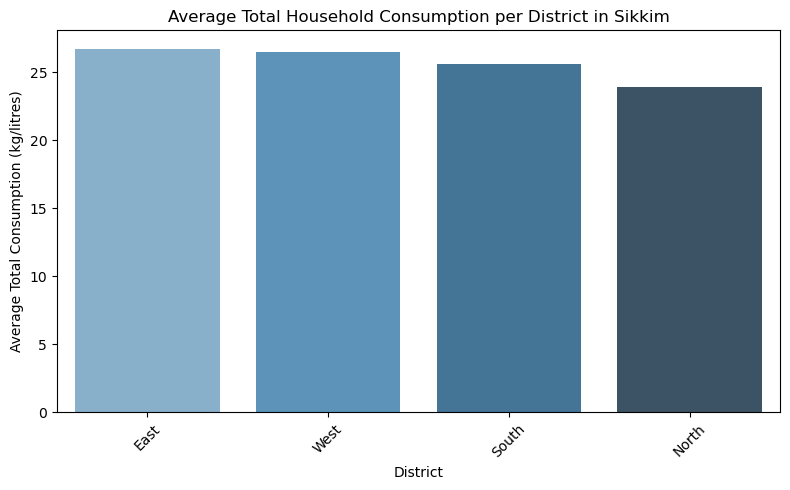

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already created the 'sikkim_data' DataFrame and added 'total_cons' & 'district_name'

# Step: Group by district and calculate average or total consumption
district_consumption = sikkim_data.groupby("district_name")["total_cons"].mean().reset_index()

# Step: Sort for clean visualization (optional)
district_consumption = district_consumption.sort_values(by="total_cons", ascending=False)

# Step: Plot barplot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=district_consumption,
    x="district_name",
    y="total_cons",
    palette="Blues_d"
)
plt.title("Average Total Household Consumption per District in Sikkim")
plt.xlabel("District")
plt.ylabel("Average Total Consumption (kg/litres)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()